In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Topic Modelling

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/oct_delta.csv')

# drop data with missing values in the 'text' column
df = df.dropna(axis=0, subset=['text'])

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Part-of-speech tagging
    tagged_tokens = nltk.pos_tag(tokens)

    # Filter tokens that are nouns or adjectives
    # NN* for nouns, JJ* for adjectives
    tokens = [word for word, tag in tagged_tokens if tag in ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

    return ' '.join(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['text']= df['text'].apply(preprocess_text)

In [ ]:
# Tokenize
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# create list of tokens
documents = df['tokens'].tolist()

# create the dictionary
dictionary = Dictionary(documents) # list of lists (documents)

# filter extremes from the dictionary (optional, but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

# create bag-of-words representation
corpus = [dictionary.doc2bow(document) for document in documents]

In [ ]:
# Set parameters
num_topics = 2
passes = 10

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.048*"sorry" + 0.033*"hi" + 0.028*"confirmation" + 0.024*"pls" + 0.022*"aa" + 0.021*"apologies" + 0.020*"thank" + 0.020*"delta" + 0.019*"thanks" + 0.019*"amp"')
(1, '0.044*"team" + 0.033*"flight" + 0.032*"ng" + 0.029*"number" + 0.027*"hi" + 0.026*"pl" + 0.022*"welcome" + 0.020*"happy" + 0.019*"rs" + 0.019*"ml"')


[0.3409436294305851, 0.35382065682470726, 0.35679330517546604, 0.35943305023208244]


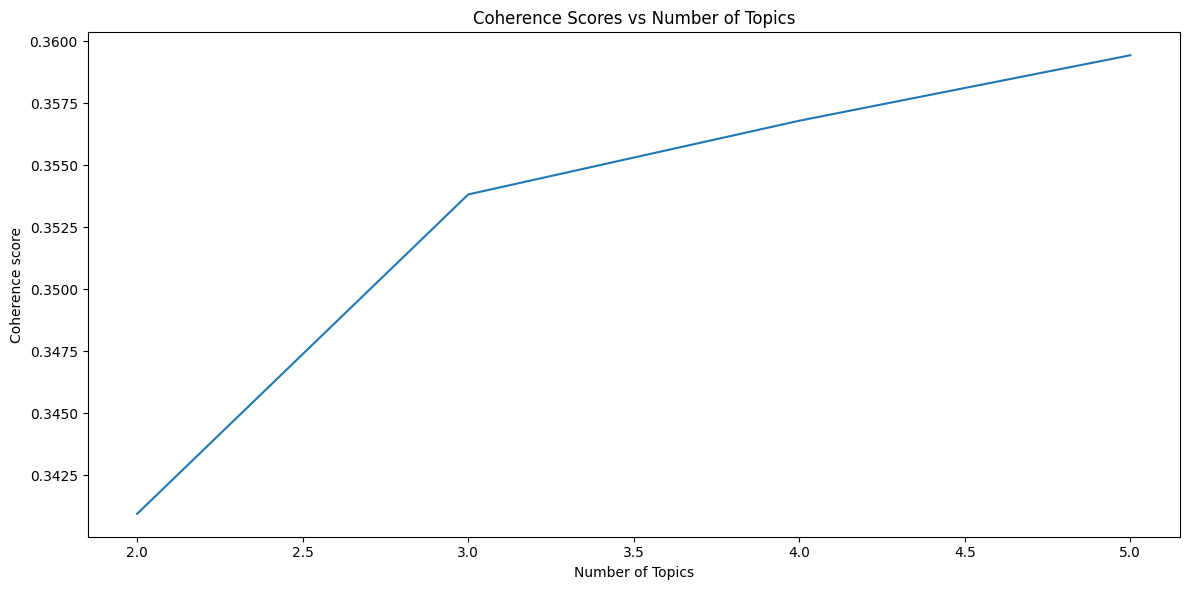

In [ ]:
import matplotlib.pyplot as plt

# Range of topics to evaluate
topic_range = range(2, 6)

# List to store coherence
coherence_scores = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores.append(coherence_lda)

print(coherence_scores)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()

In [ ]:
# Set optimal number of topics
num_topics = 3
passes = 10

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.073*"hi" + 0.049*"sorry" + 0.047*"team" + 0.028*"pls" + 0.024*"mr" + 0.024*"http" + 0.024*"service" + 0.020*"baggage" + 0.019*"kc" + 0.019*"assistance"')
(1, '0.047*"thanks" + 0.044*"flight" + 0.035*"welcome" + 0.032*"pl" + 0.026*"thank" + 0.024*"apologies" + 0.023*"rd" + 0.022*"great" + 0.022*"vm" + 0.021*"team"')
(2, '0.067*"confirmation" + 0.037*"sorry" + 0.037*"number" + 0.032*"delta" + 0.028*"ng" + 0.027*"amp" + 0.026*"follow" + 0.024*"pls" + 0.023*"pl" + 0.023*"happy"')


In [ ]:
# Print the top 10 terms for each topic
for topic_id in range(num_topics):
    top_terms = lda.show_topic(topic_id, topn=10)  # Get the top 10 terms for this topic
    terms = ', '.join([term for term, _ in top_terms])
    print(f"Topic {topic_id}: {terms}")

Topic 0: hi, sorry, team, pls, mr, http, service, baggage, kc, assistance
Topic 1: thanks, flight, welcome, pl, thank, apologies, rd, great, vm, team
Topic 2: confirmation, sorry, number, delta, ng, amp, follow, pls, pl, happy
